# ELECTION EXIT POLL PREDICTION :

PROBLEM 1 : UK ELECTION

In [132]:
import numpy as np
import pandas as pd
import nltk
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

**DATA INGESTION :**

**1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.**

In [133]:
from google.colab import files
uploaded = files.upload()


Saving Election_Data.xlsx to Election_Data.xlsx


In [134]:
import io
df=pd.read_excel(io.BytesIO(uploaded['Election_Data.xlsx']),sheet_name='Election_Dataset_Two Classes')


In [135]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [136]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [138]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [139]:
df.skew()

<ipython-input-139-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Unnamed: 0                 0.000000
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [140]:
df.shape

(1525, 10)

THERE ARE 1525 ROWS AND 10 COLUMNS PRESENT IN THE DATASET

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


CHECK NULL VALUES :

In [142]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

THERE ARE NO NULL VALUES PRESENT

CHECK DUPLICATES :

In [143]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 0


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


THERE ARE NO DUPLICATES PRESENT IN THE DATASET

In [144]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

REMOVAL OF UNWANTED COLUMNS :

In [145]:
df=df.drop('Unnamed: 0',axis=1)
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [146]:
df.shape

(1525, 9)

In [ ]:
df.gender.value_counts()

female    812
male      713
Name: gender, dtype: int64

In [ ]:
df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

**INFERENCES** :

1) Presence of 1525 Rows and 10 Columns in the given Dataset

2) No NULL values are there. 

3) No Duplicates present 

4)There are NO Missing values present

5) There are 8 Numerical and 2 Categorical variables present

6)Removal of an unwanted column 'Unnamed: 0'.Finally presence of 1525 Rows and  9 Columns in the dataset. 

7) 812 females & 713 Males taken part in survey

8) 1063 votes polled in favour of Labour party and 462 votes in favour of Conservative party

**1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)**

UNIVARIATE ANALYSIS :

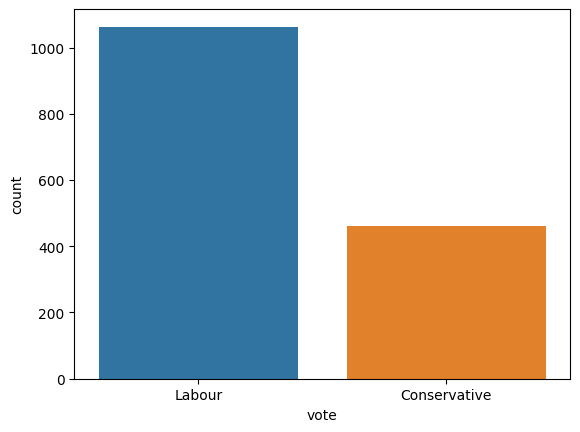

In [ ]:
sns.countplot(x='vote',data=df);

**OUT OF 1525 , 1063 PEOPLES VOTE IN FAVOUR OF LABOUR PARTY IN UK ELECTION**

<Axes: xlabel='age'>

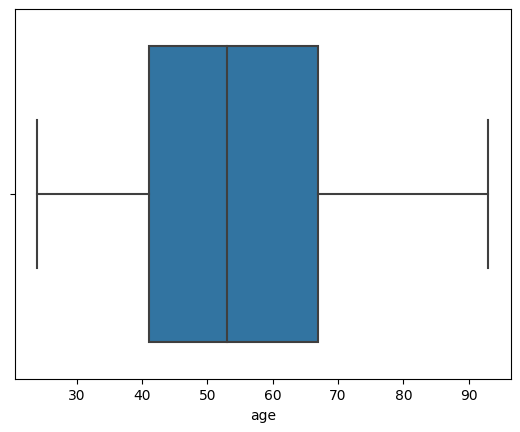

In [ ]:
sns.boxplot(x='age', data=df)

**PEOPLE TAKEN PART IN THE SURVEY ARE BETWEEN 24 TO 93 AGE GROUP**

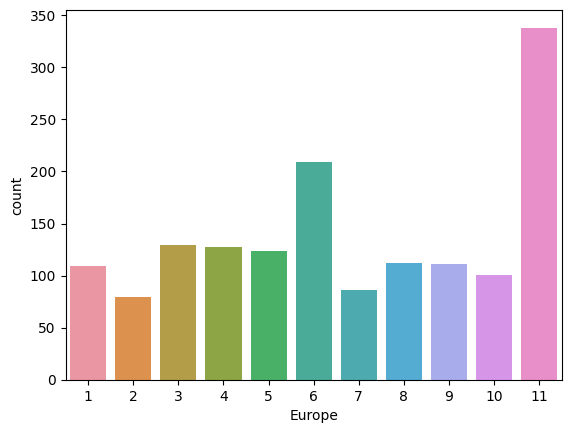

In [ ]:
sns.countplot(data=df,x='Europe');

**OUT OF 1525, 338 PEOPLE STRONGLY SUPPORT BREXIT (EUROSEPTIC) i.e) 22% people** 

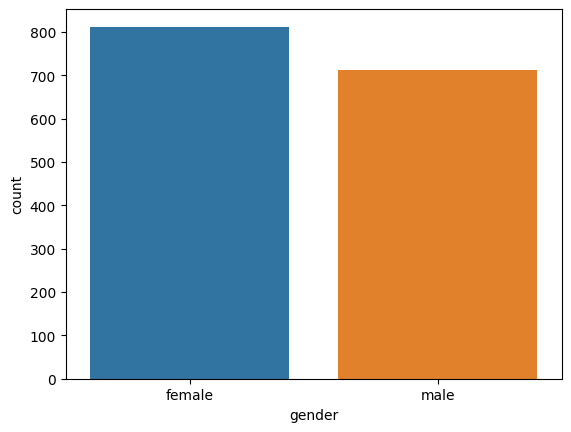

In [ ]:
sns.countplot(data=df,x='gender');

**HERE OUT OF 1525, 812 FEMALES PARTICIPATED IN THE SURVEY i.e) 53.2%**

Text(0.5, 1.0, 'ASSESSMENT OF LABOUR LEADER')

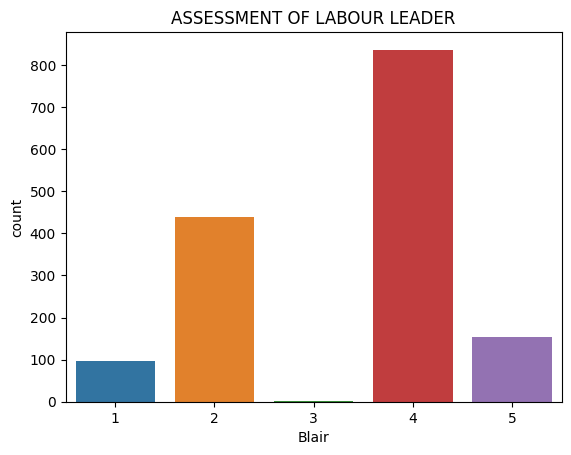

In [ ]:
sns.countplot(data=df,x='Blair');
plt.title('ASSESSMENT OF LABOUR LEADER')

**MAXIMUM NUMBER OF PEOPLES i.e) 836  PROVIDE HIGHEST RATING OF 4 TO LABOUR LEADER AND ONLY 153 PROVIDE 5 AS RATING**

Text(0.5, 1.0, 'ASSESSMENT OF CONSERVATIVE LEADER')

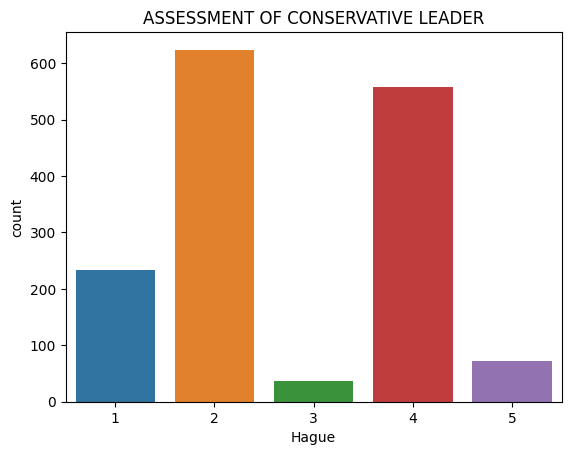

In [ ]:
sns.countplot(data=df,x='Hague');
plt.title('ASSESSMENT OF CONSERVATIVE LEADER')

**MAXIMUM NUMBER OF PEOPLE i.e) 624 PROVIDE 2 AS HIGHEST RATING TO CONSERVATIVE LEADER AND ONLY 73 PROVIDE 5 AS RATING**

<Axes: xlabel='economic.cond.national', ylabel='count'>

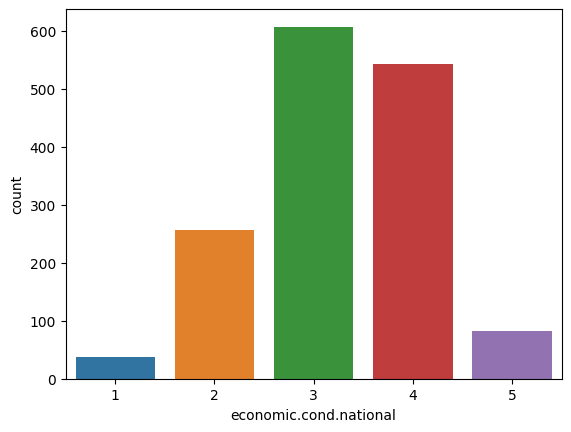

In [ ]:
sns.countplot(data=df,x='economic.cond.national')

<Axes: xlabel='economic.cond.household', ylabel='count'>

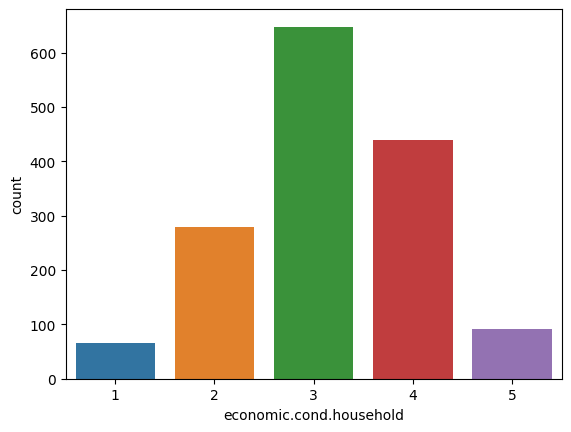

In [ ]:
sns.countplot(data=df,x='economic.cond.household')

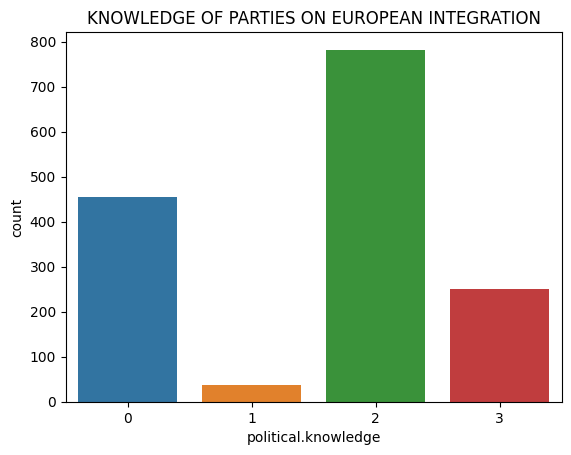

In [ ]:
sns.countplot(data=df,x='political.knowledge')
plt.title('KNOWLEDGE OF PARTIES ON EUROPEAN INTEGRATION');

<ipython-input-11-797c56793596>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=True, ax=axes[0][0])
<ipython-input-11-797c56793596>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['economic.cond.national'] , kde=True, ax=axes[1][0])
<ipython-input-11-797c56793596>:7: UserWar

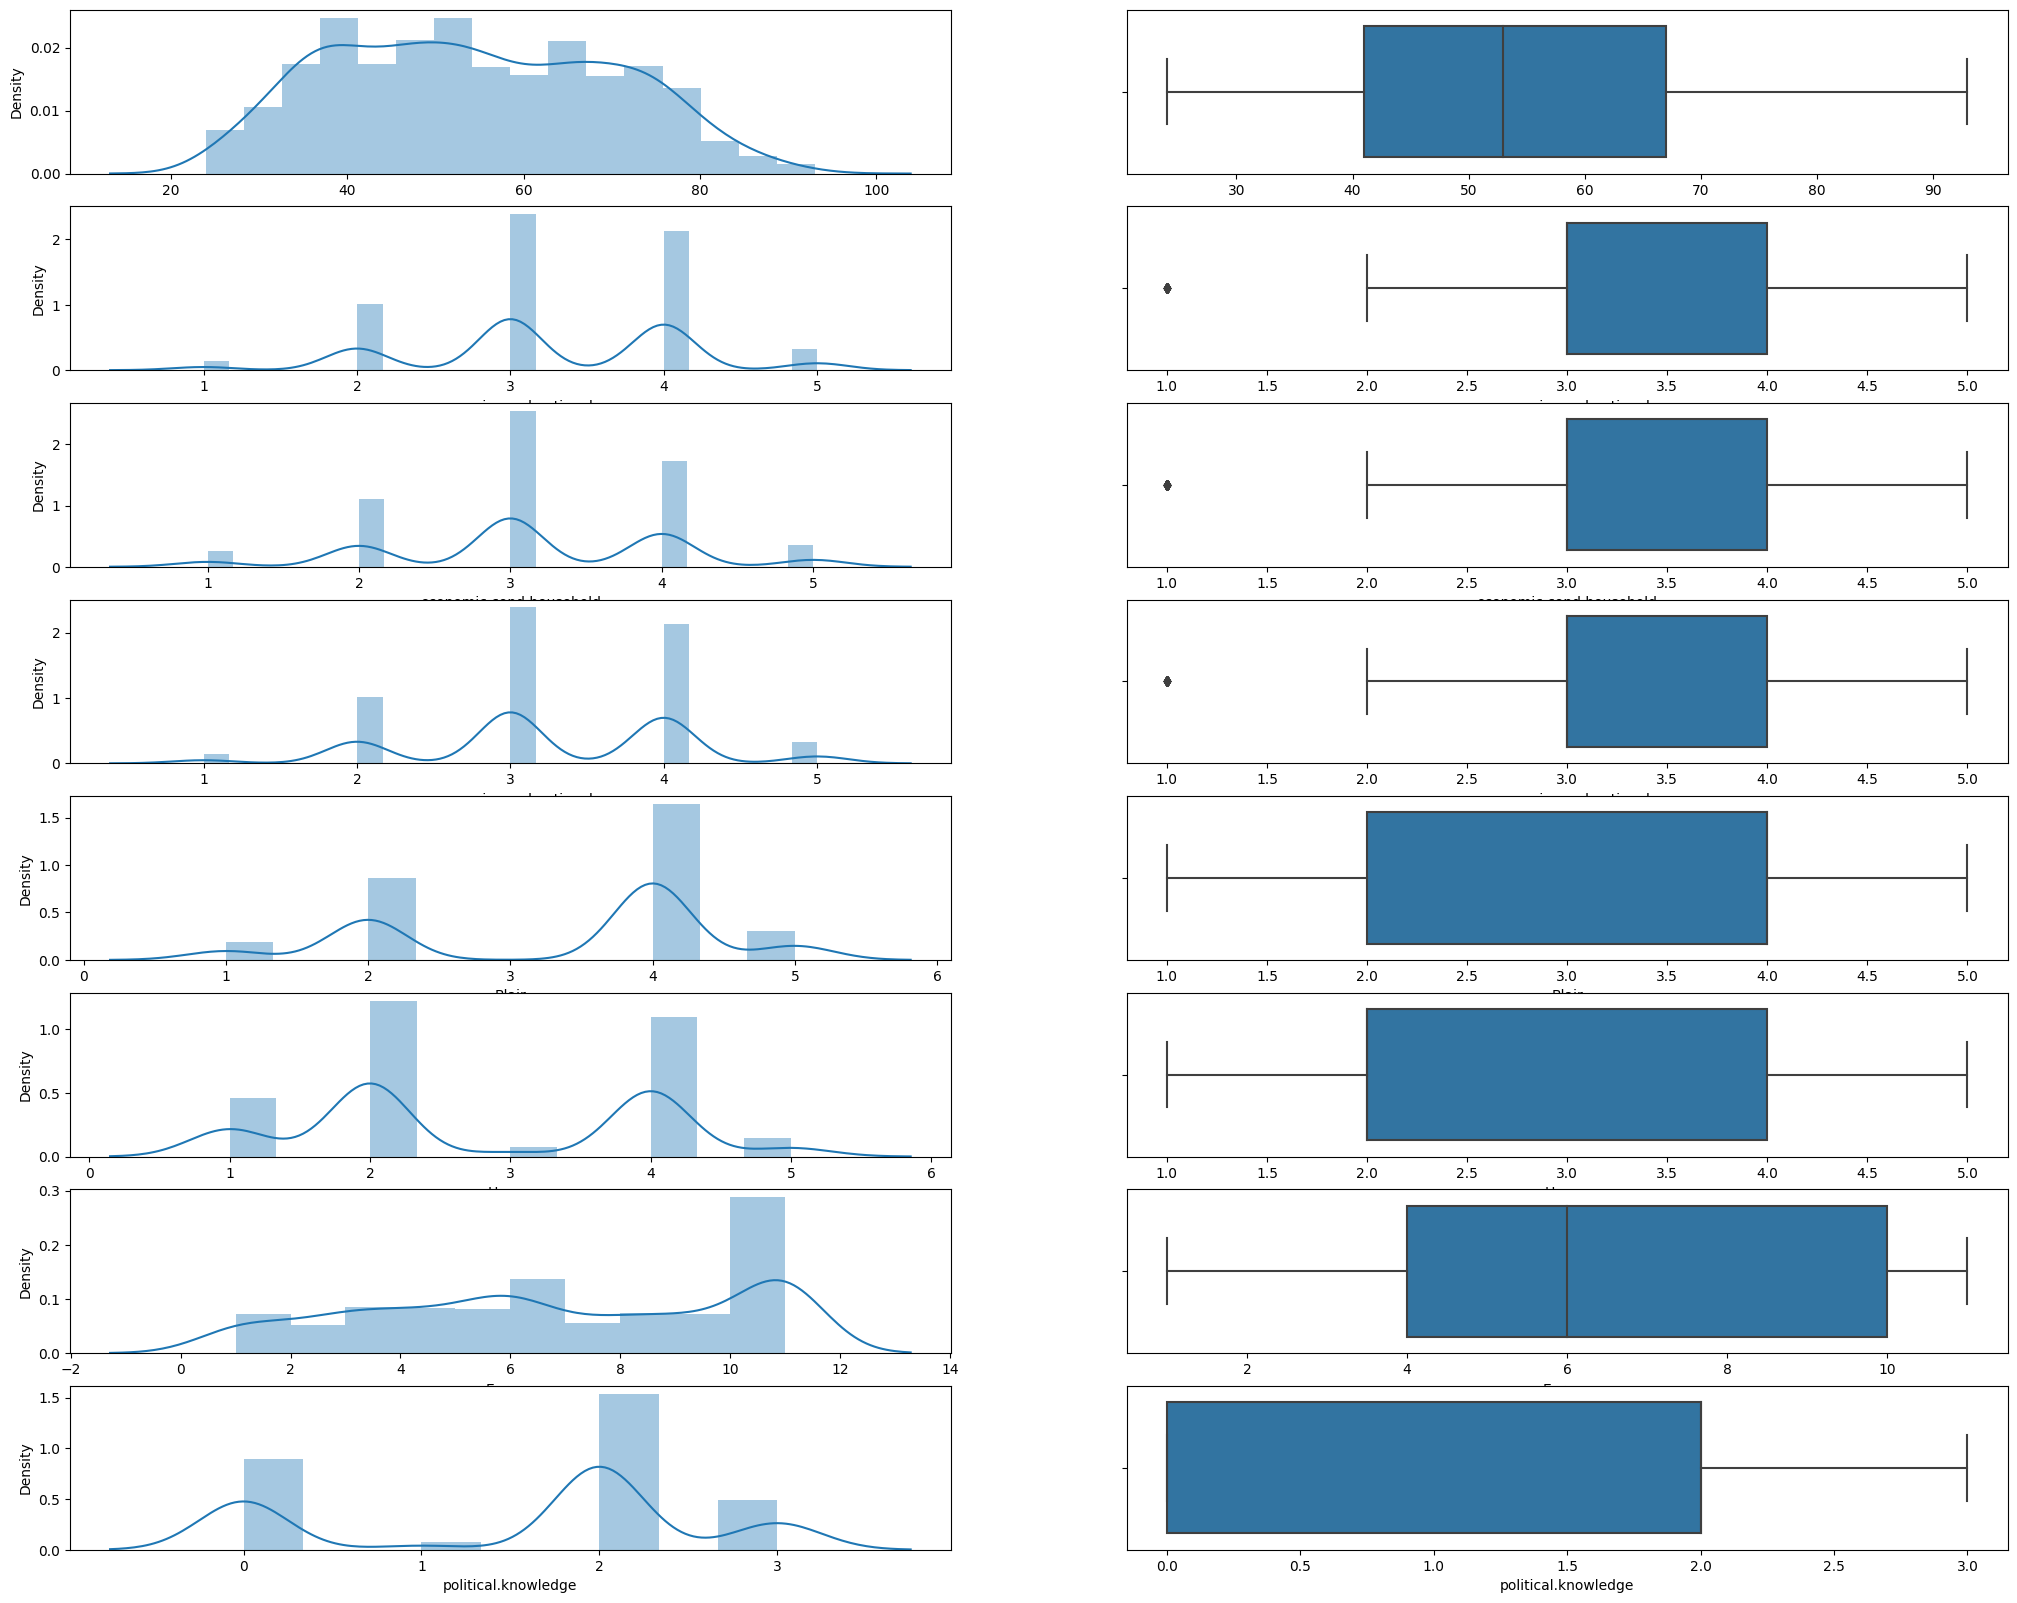

In [ ]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(25,20)
sns.distplot(df['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=df, ax=axes[0][1])
sns.distplot(df['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=df , ax=axes[1][1])
sns.distplot(df['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=df, ax=axes[2][1])
sns.distplot(df['economic.cond.national'] , kde=True, ax=axes[3][0])
sns.boxplot(x='economic.cond.national', data=df , ax=axes[3][1])
sns.distplot(df['Blair'], kde=True, ax=axes[4][0])
sns.boxplot(x='Blair', data=df, ax=axes[4][1])
sns.distplot(df['Hague'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Hague', data=df , ax=axes[5][1])
sns.distplot(df['Europe'] , kde=True, ax=axes[6][0])
sns.boxplot(x='Europe', data=df, ax=axes[6][1])
sns.distplot(df['political.knowledge'], kde=True, ax=axes[7][0])
sns.boxplot(x='political.knowledge', data=df, ax=axes[7][1])

plt.show()

**BIVARIATE ANALYSIS :**

GENDER vs VOTE :

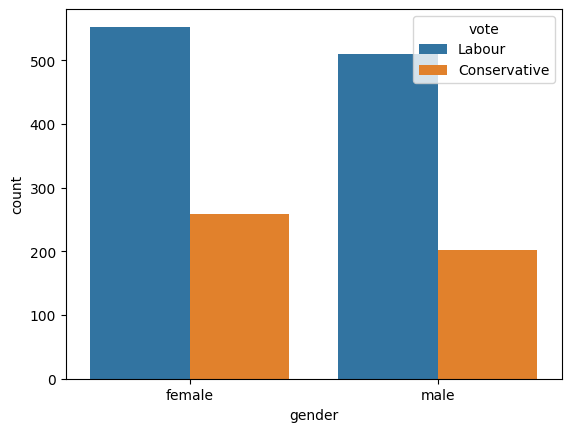

In [ ]:
sns.countplot(data=df,x='gender',hue='vote');

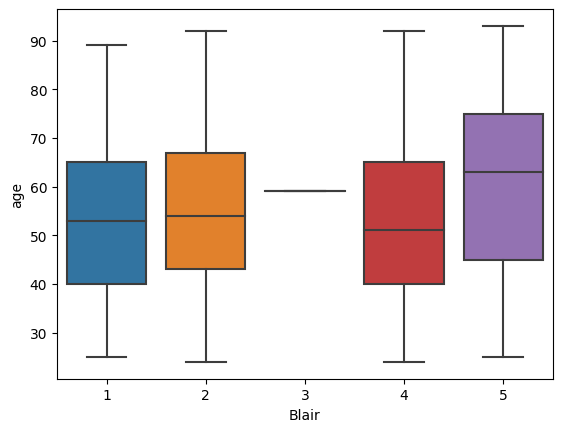

In [ ]:
sns.boxplot(data=df,x='Blair',y='age');

In [ ]:
df.groupby(['vote'])['economic.cond.national'].value_counts()


vote          economic.cond.national
Conservative  3                         200
              2                         140
              4                          92
              1                          21
              5                           9
Labour        4                         450
              3                         407
              2                         117
              5                          73
              1                          16
Name: economic.cond.national, dtype: int64

In [ ]:
df.groupby(['vote'])['gender'].value_counts()

vote          gender
Conservative  female    259
              male      203
Labour        female    553
              male      510
Name: gender, dtype: int64

<Axes: xlabel='vote', ylabel='age'>

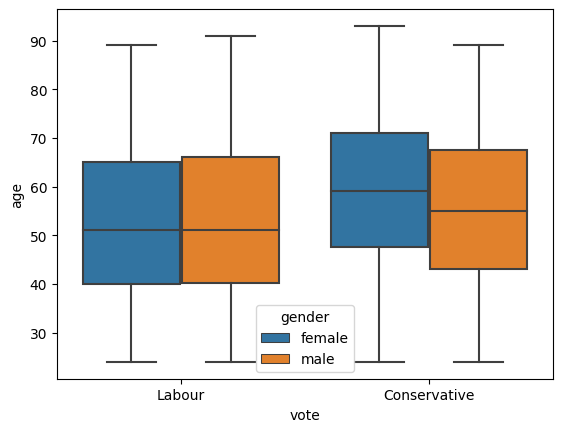

In [ ]:
sns.boxplot(y='age',x='vote',hue='gender',data=df)

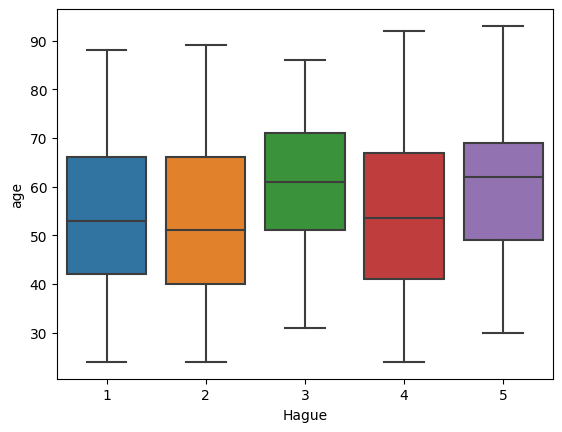

In [ ]:
sns.boxplot(data=df,x='Hague',y='age');

<ipython-input-30-bf968b95b613>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data =df,x="vote",y="economic.cond.household",ci=False);


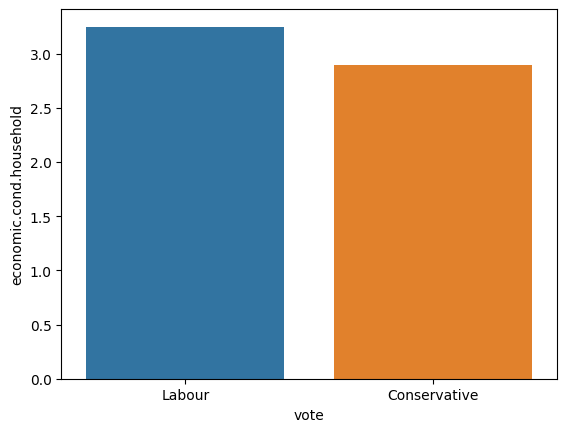

In [ ]:
sns.barplot(data =df,x="vote",y="economic.cond.household",ci=False);

In [ ]:
df.groupby(['vote'])['economic.cond.household'].value_counts()

vote          economic.cond.household
Conservative  3                          198
              2                          126
              4                           87
              1                           28
              5                           23
Labour        3                          450
              4                          353
              2                          154
              5                           69
              1                           37
Name: economic.cond.household, dtype: int64

<ipython-input-29-f61ffba47350>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data =df,x="Hague",y="economic.cond.national",ci=False);


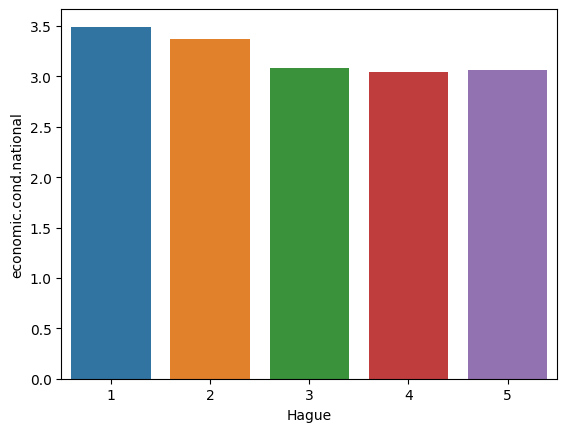

In [ ]:
sns.barplot(data =df,x="Hague",y="economic.cond.national",ci=False);

<ipython-input-30-e41050892fff>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data =df,x="Blair",y="economic.cond.household",ci=False);


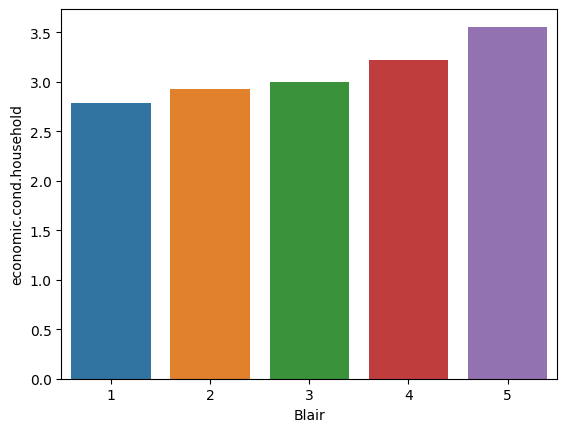

In [ ]:
sns.barplot(data =df,x="Blair",y="economic.cond.household",ci=False);

<ipython-input-31-f10ecbf66db7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data =df,x="Hague",y="economic.cond.household",ci=False)


<Axes: xlabel='Hague', ylabel='economic.cond.household'>

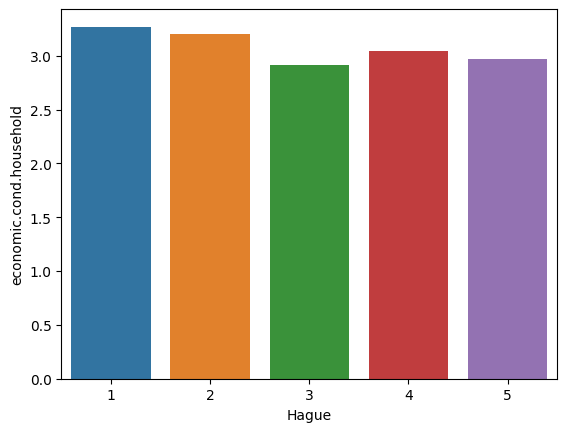

In [ ]:
sns.barplot(data =df,x="Hague",y="economic.cond.household",ci=False)

<ipython-input-32-ce314f58d570>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data =df,x="Blair",y="Europe",ci=False)


<Axes: xlabel='Blair', ylabel='Europe'>

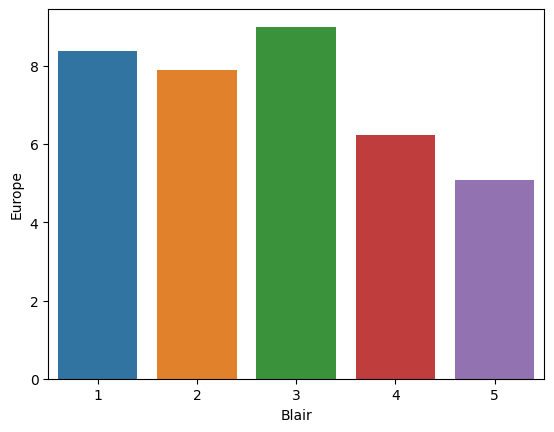

In [ ]:
sns.barplot(data =df,x="Blair",y="Europe",ci=False)

**THOSE WHO STRONGLY SUPPORT (BLAIR = 5) LABOUR PARTY PROVIDE ONLY A MAX OF 5 POINT FOR BREXIT.**

<ipython-input-34-500635733cd0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data =df,x="Hague",y="Europe",ci=False)


<Axes: xlabel='Hague', ylabel='Europe'>

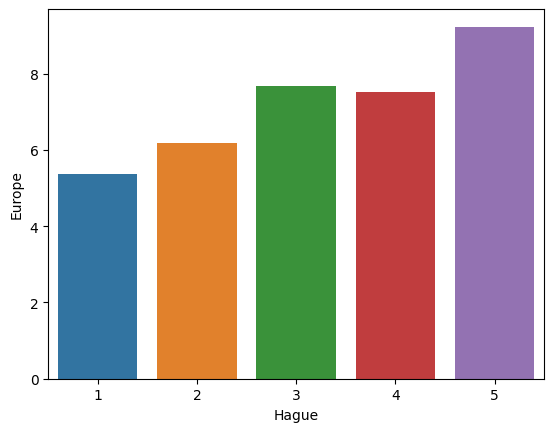

In [ ]:
sns.barplot(data =df,x="Hague",y="Europe",ci=False)

<ipython-input-38-500635733cd0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data =df,x="Hague",y="Europe",ci=False)


<Axes: xlabel='Hague', ylabel='Europe'>

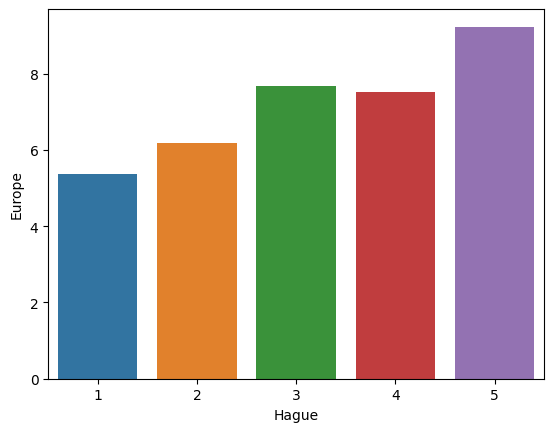

In [ ]:
sns.barplot(data =df,x="Hague",y="Europe",ci=False)

**THOSE WHO STRONGLY SUPPORT (HAGUE = 5) CONSERVATIVE PARTY PROVIDE MAX OF 10 POINTS FOR BREXIT.SO WE CONCLUDE THAT CONSERVATIVE PARTY SUPPORTERS FAVOURS BREXIT MORE THAN LABOUR PARTY SUPPORTERS**

<ipython-input-39-c10199c0c91d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data =df,x="vote",y="Europe",ci=False)


<Axes: xlabel='vote', ylabel='Europe'>

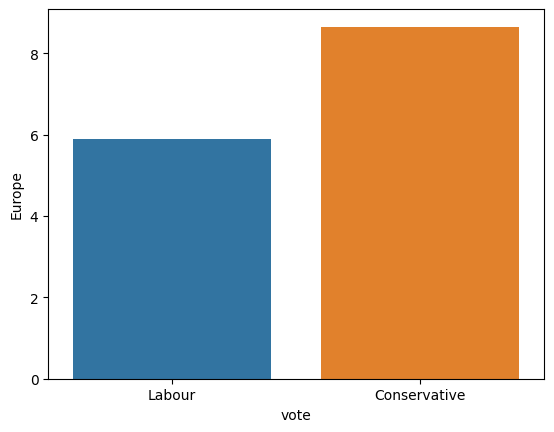

In [ ]:
sns.barplot(data =df,x="vote",y="Europe",ci=False)

**MULTIVARIATE ANALYSIS :**

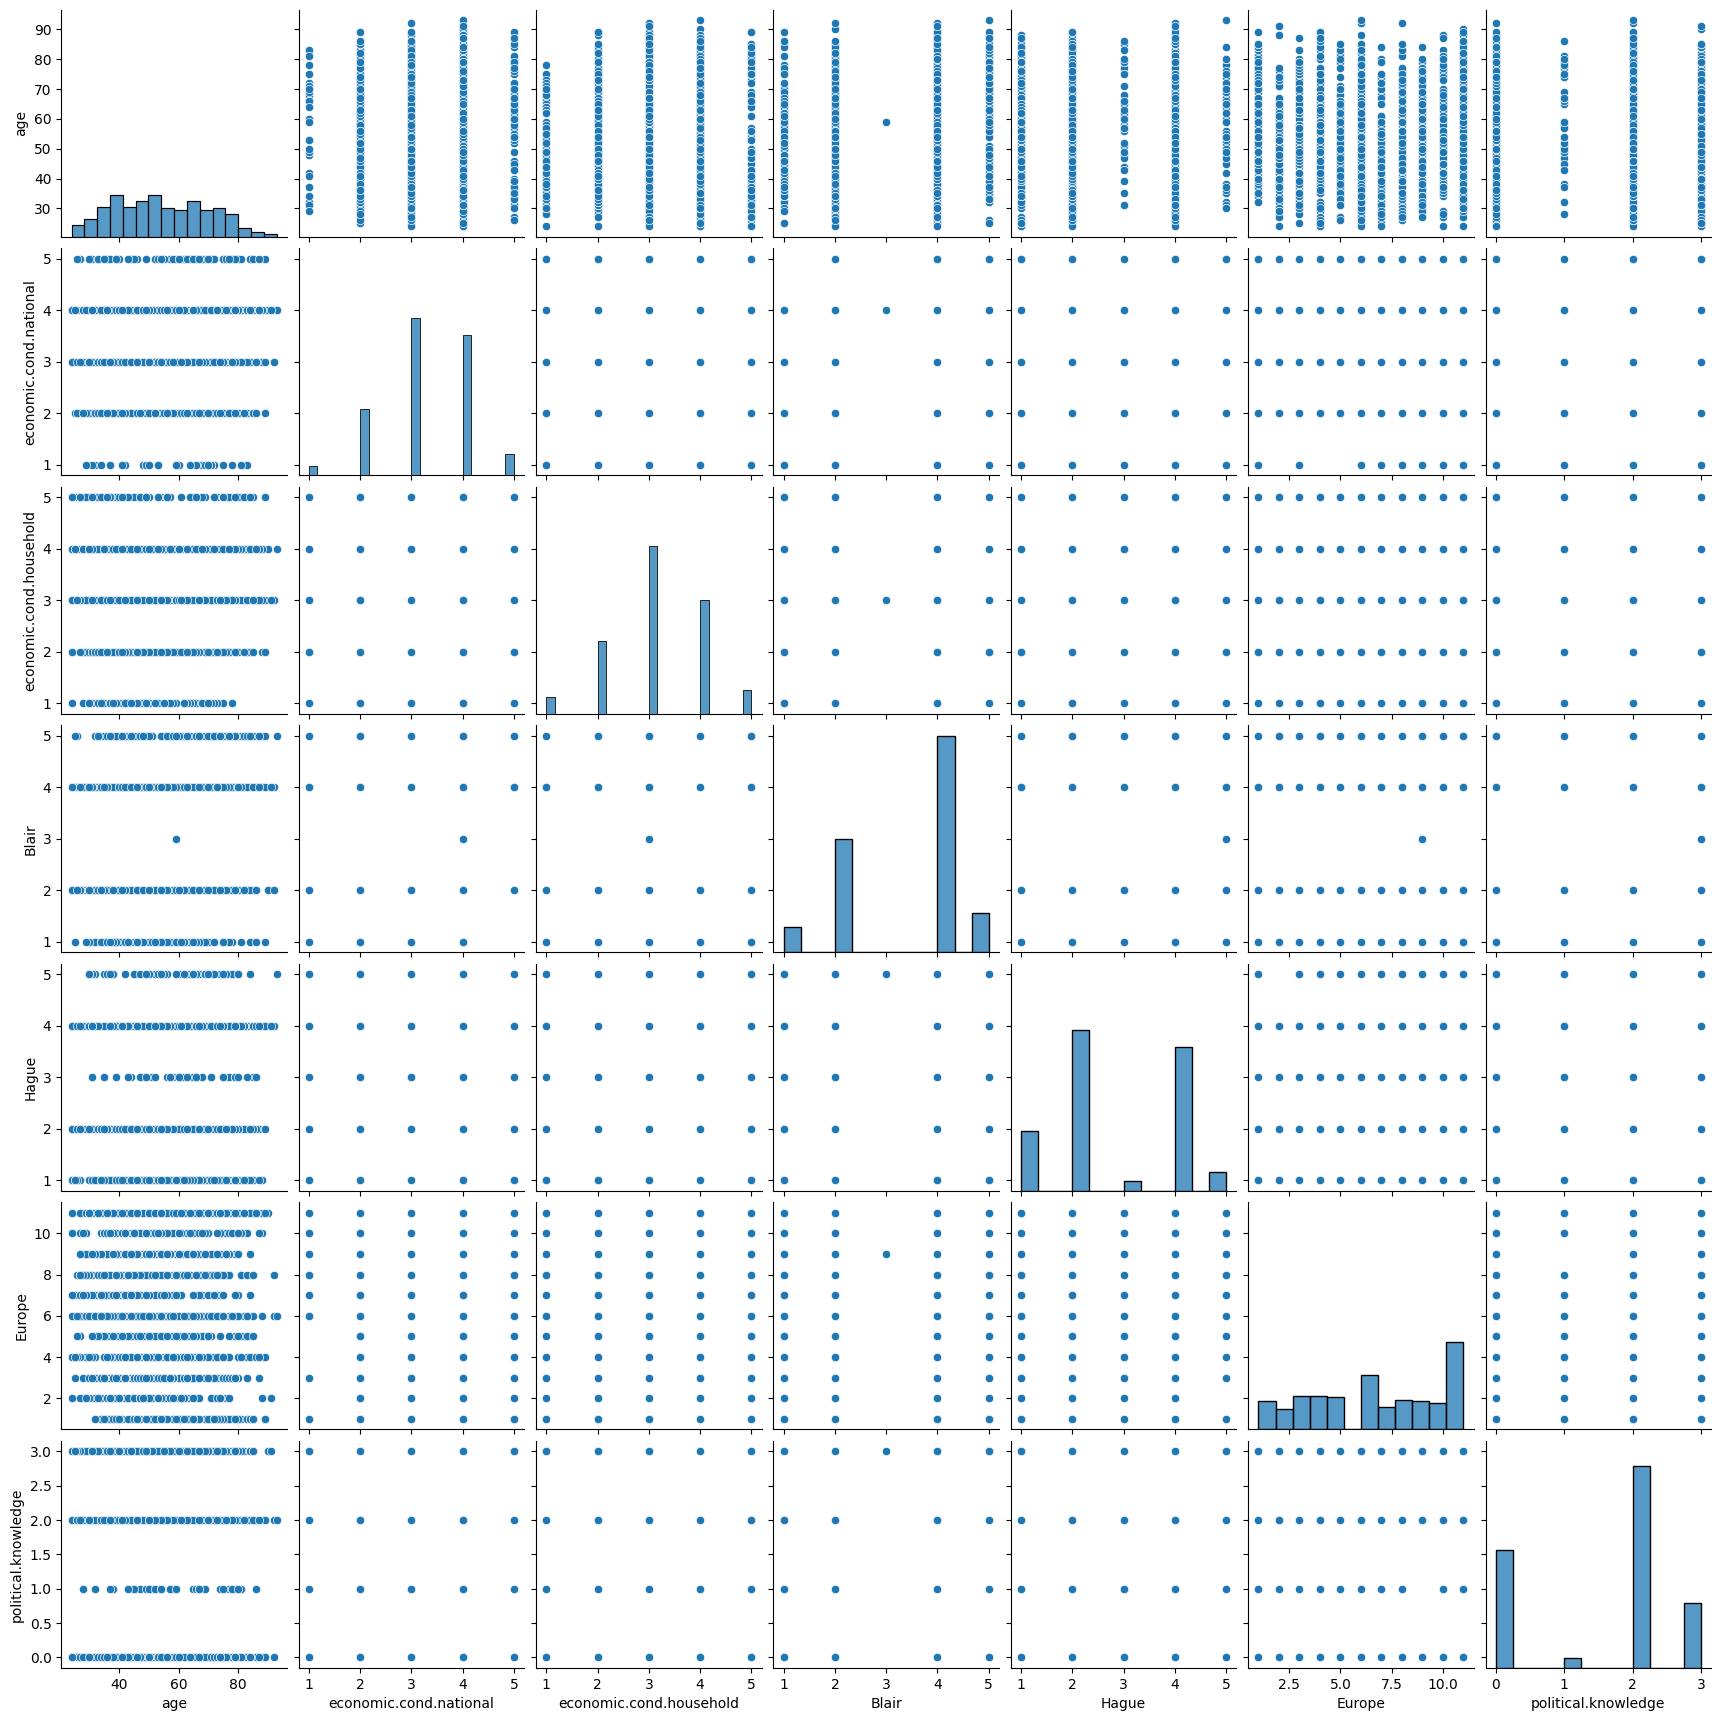

In [ ]:
sns.pairplot(df)

<ipython-input-35-fe2252758f39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

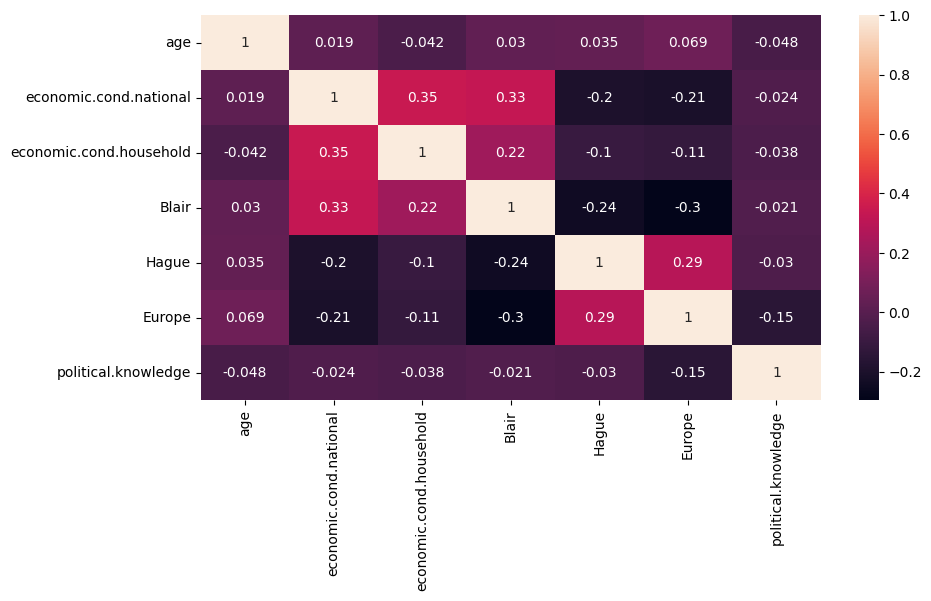

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

**CHECKING OUTLIERS :**

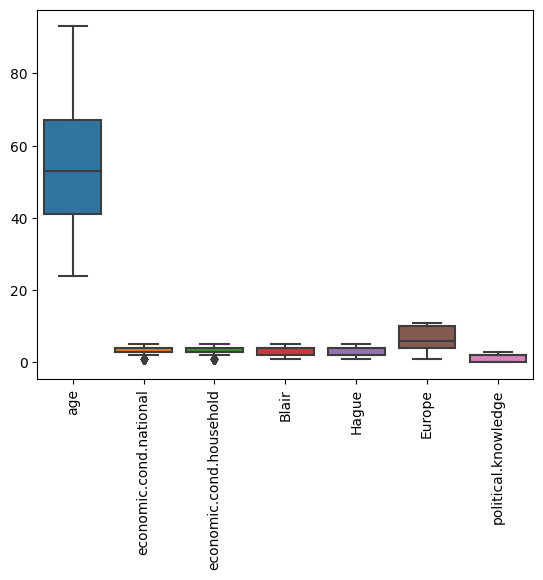

In [ ]:
sns.boxplot(data=df)
plt.xticks(rotation=90);

**PRESENCE OF OUTLIERS IN ECONOMIC.COND.NATIONAL AND ECONOMIC.COND.HOUSEHOLD**

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


**DATA PREPARATION: 4 marks**

**1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)**

In [ ]:
cat1=['vote','gender']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [ ]:
for feature in df.columns:
  if df[feature].dtypes=='object':
    df[feature]=pd.Categorical(df[feature])

In [ ]:
election = pd.get_dummies(df,columns=cat1,drop_first=True)

In [ ]:
election.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [ ]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
 7   vote_Labour              1525 non-null   uint8
 8   gender_male              1525 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 86.5 KB


In [ ]:
df_num=df[['economic.cond.household','economic.cond.national','Blair','Hague','Europe','political.knowledge']]
df_num

,economic.cond.household,economic.cond.national,Blair,Hague,Europe,political.knowledge
0,3,3,4,1,2,2
1,4,4,4,4,5,2
2,4,4,5,2,3,2
3,2,4,2,1,4,0
4,2,2,1,1,6,2
...,...,...,...,...,...,...
1520,3,5,2,4,11,3
1521,2,2,4,4,8,2
1522,3,3,5,4,2,2
1523,3,3,1,4,11,2


['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']
['vote', 'gender']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(df_num)
data_minmax=scaler.transform(df_num)
data_minmax=pd.DataFrame(data_minmax,columns=df_num.columns)

In [ ]:
data_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
economic.cond.household,1525.0,0.535082,0.232488,0.0,0.50,0.500000,0.750000,1.0
economic.cond.national,1525.0,0.561475,0.220242,0.0,0.50,0.500000,0.750000,1.0
Blair,1525.0,0.583607,0.293706,0.0,0.25,0.750000,0.750000,1.0
Hague,1525.0,0.436721,0.307676,0.0,0.25,0.250000,0.750000,1.0
Europe,1525.0,0.572852,0.329754,0.0,0.30,0.500000,0.900000,1.0
political.knowledge,1525.0,0.514098,0.361105,0.0,0.00,0.666667,0.666667,1.0


**SPLIT THE DATA :**

FOR BETTER INTERPRETATION CONVERT OBJECT INTO CATEGORICAL :

In [ ]:
election.dtypes

age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
vote_Labour                uint8
gender_male                uint8
dtype: object

In [ ]:
x=election.drop('vote_Labour',axis=1)
y=election.pop('vote_Labour')

In [ ]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

**MODELLING :**

**1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)**

**LOGISTIC REGRESSION :**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 1)
log.fit(x_train,y_train)

LogisticRegression(max_iter=2000, random_state=1)

In [ ]:
y_train_predict=log.predict(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

[[229 103]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



Axes(0.125,0.11;0.62x0.77)


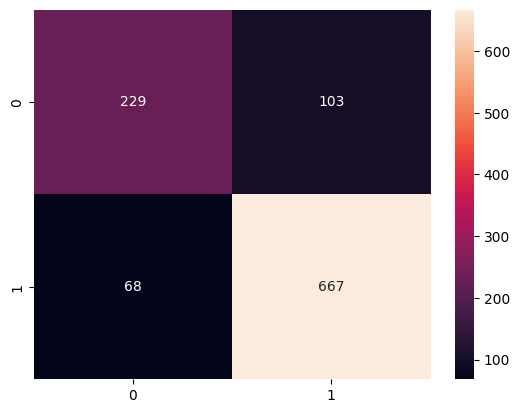

In [ ]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True,fmt="2g"))

In [ ]:
y_test_predict=log.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



Axes(0.125,0.11;0.62x0.77)


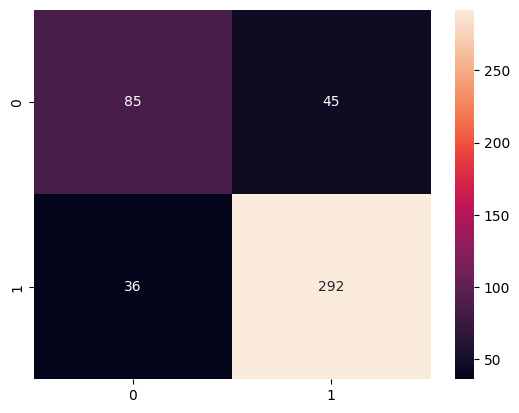

In [ ]:
print(sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True,fmt="2g"))

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16026241799437677


In [ ]:
print(mean_squared_error(y_test_predict, y_test))

NameError: ignored

**ROC , AUC SCORES & CURVE :**

AUC :0.8894


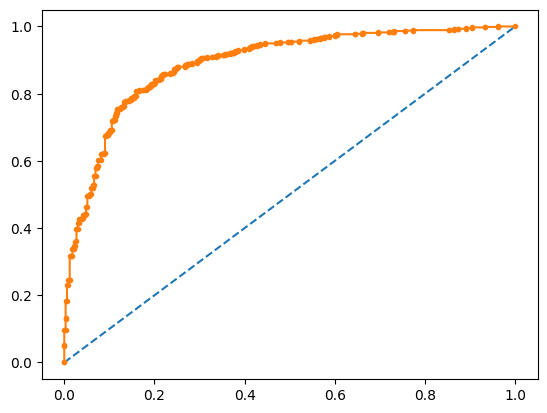

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
#ROC and AUC for TRAIN DATA
probs=log.predict_proba(x_train)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC :0.8825


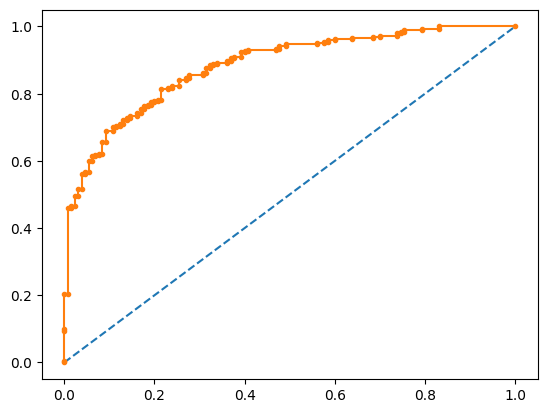

In [ ]:
#ROC and AUC for TEST DATA
probs=log.predict_proba(x_test)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**LINEAR DISCRIMINANT ANALYSIS :**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda=lda.fit(x_train,y_train)

In [ ]:
y_train_predict=lda.predict(x_train)
y_test_predict=lda.predict(x_test)

In [ ]:
print(confusion_matrix(y_train_predict,y_train))
print(classification_report(y_train_predict,y_train))

[[233  75]
 [ 99 660]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       308
           1       0.90      0.87      0.88       759

    accuracy                           0.84      1067
   macro avg       0.80      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [ ]:
print(confusion_matrix(y_test_predict,y_test))
print(classification_report(y_test_predict,y_test))

[[ 86  39]
 [ 44 289]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       125
           1       0.88      0.87      0.87       333

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.82      0.82       458



In [ ]:
lda_score=lda.score(x_train,y_train)
print('lda score for train data :',lda_score)

lda score for train data : 0.8369259606373008


In [ ]:
lda_score=lda.score(x_test,y_test)
print('lda score for test data :',lda_score)

lda score for test data : 0.8187772925764192


AUC :0.8892


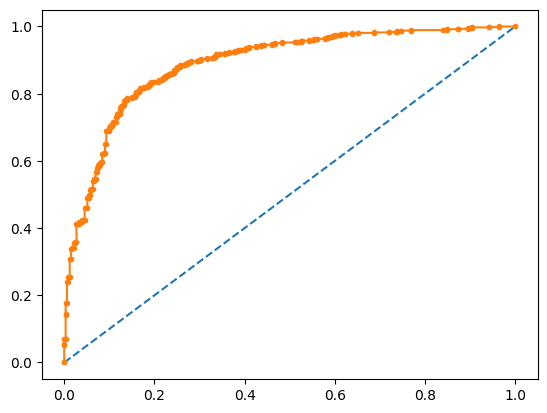

In [ ]:
#ROC and AUC for TRAIN DATA
probs=lda.predict_proba(x_train)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC :0.8838


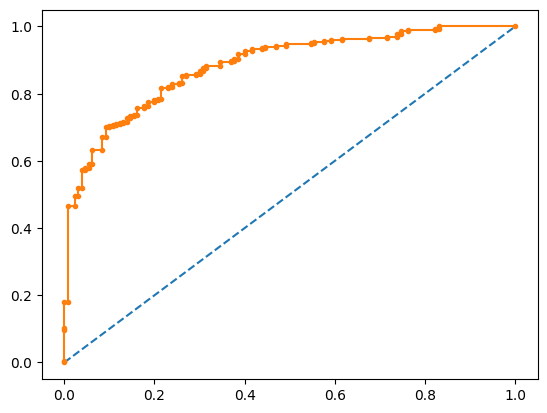

In [ ]:
#ROC and AUC for TEST DATA
probs=lda.predict_proba(x_test)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)**

**KNN MODEL :**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(x_train,y_train)

In [ ]:
pred= knn.predict(x_test)
knn.score(x_test,y_test)
pred= knn.predict(x_test)
knn.score(x_test,y_test)

0.7816593886462883

In [ ]:
print(confusion_matrix(y_train,knn.predict(x_train)))
print(classification_report(y_train,knn.predict(x_train)))

[[244  88]
 [ 63 672]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [ ]:
print(confusion_matrix(y_test,knn.predict(x_test)))
print(classification_report(y_test,knn.predict(x_test)))

[[ 81  49]
 [ 51 277]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       130
           1       0.85      0.84      0.85       328

    accuracy                           0.78       458
   macro avg       0.73      0.73      0.73       458
weighted avg       0.78      0.78      0.78       458



In [ ]:
knn_score=knn.score(x_train,y_train)
print('knn score for train data :',knn_score)

knn score for train data : 0.8584817244611059


In [ ]:
knn_score=knn.score(x_test,y_test)
print('knn score for test data :',knn_score)

knn score for test data : 0.7816593886462883


AUC :0.9223


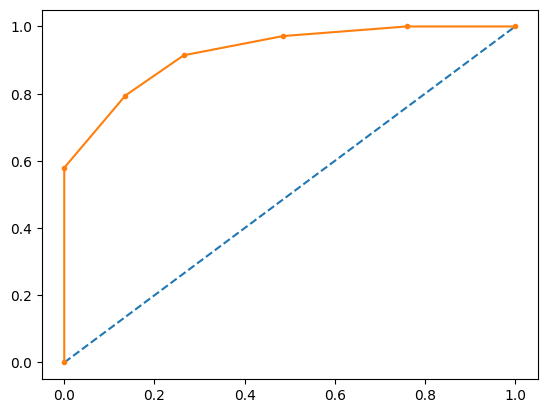

In [ ]:
#ROC and AUC for TRAIN DATA
probs=knn.predict_proba(x_train)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC :0.8295


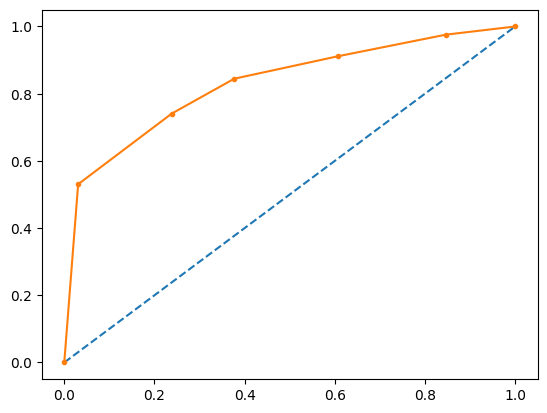

In [ ]:
#ROC and AUC for TEST DATA
probs=knn.predict_proba(x_test)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**NAIVE BAYES :**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)


GaussianNB()

In [ ]:
print(confusion_matrix(y_train,nb.predict(x_train)))
print(classification_report(y_train,nb.predict(x_train)))

[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [ ]:
print(confusion_matrix(y_test,nb.predict(x_test)))
print(classification_report(y_test,nb.predict(x_test)))

[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [ ]:
nb_score=nb.score(x_train,y_train)
print('nb score for train data :',nb_score)
nb_score=nb.score(x_test,y_test)
print('nb score for test data :',nb_score)

nb score for train data : 0.8331771321462043
nb score for test data : 0.8253275109170306


AUC :0.8865


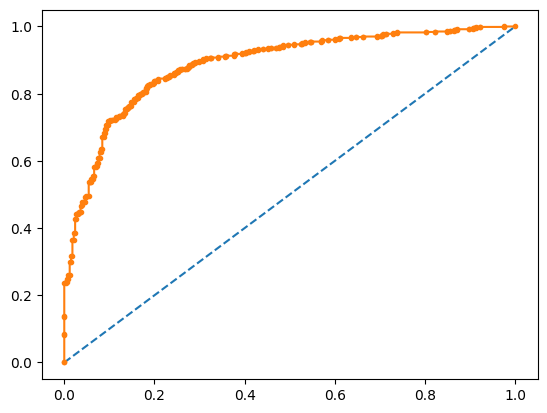

In [ ]:
#ROC and AUC for TRAIN DATA
probs=nb.predict_proba(x_train)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC :0.8845


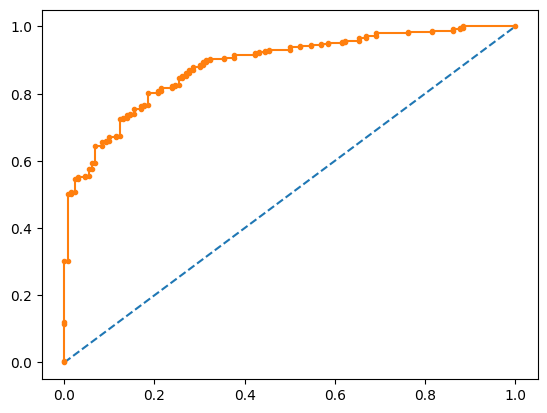

In [ ]:
#ROC and AUC for TEST DATA
probs=nb.predict_proba(x_test)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.**

MODEL TUNNING :


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

**DECISION TREE :**

In [ ]:
dt=DecisionTreeClassifier(criterion='gini',random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
Bagging_model=BaggingClassifier(base_estimator=dt,n_estimators=100, random_state=1)
Bagging_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [ ]:
y_train_predict=Bagging_model.predict(x_train)
Bagging_model_score=Bagging_model.score(x_train,y_train)
print(Bagging_model_score)
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [ ]:
y_test_predict=Bagging_model.predict(x_test)
Bagging_model_score=Bagging_model.score(x_test,y_test)
print(Bagging_model_score)

print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.7969432314410481
[[ 83  47]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



AUC :1.0000


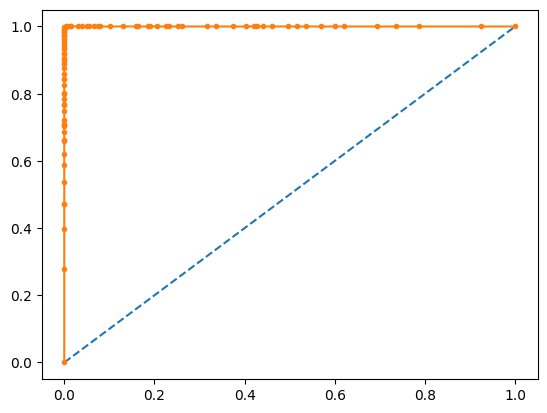

In [ ]:
#ROC and AUC for TRAIN DATA
probs=Bagging_model.predict_proba(x_train)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC :0.8773


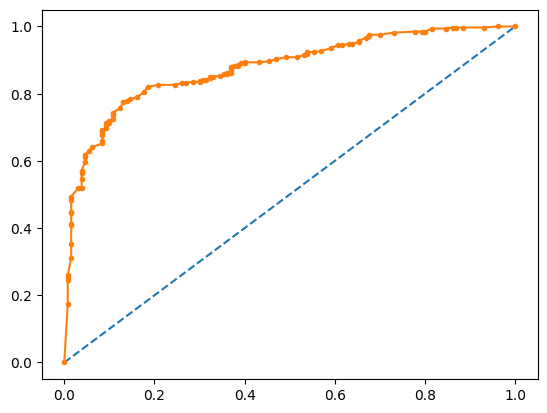

In [ ]:
#ROC and AUC for TEST DATA
probs=Bagging_model.predict_proba(x_test)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**BAGGIG : RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [ ]:
rf=RandomForestClassifier()

In [ ]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [ ]:
rf=grid_search.best_estimator_
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30,
                       random_state=0)

In [ ]:
## Performance Matrix on train data set
y_train_predict = rf.predict(x_train)
rf_model_score = rf.score(x_train, y_train)
print(rf_model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8388003748828491
[[208 124]
 [ 48 687]]
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       332
           1       0.85      0.93      0.89       735

    accuracy                           0.84      1067
   macro avg       0.83      0.78      0.80      1067
weighted avg       0.84      0.84      0.83      1067



In [ ]:
## Performance Matrix on test data set
y_test_predict = rf.predict(x_test)
rf_test_model_score = rf.score(x_test, y_test)
print(rf_test_model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.834061135371179
[[ 82  48]
 [ 28 300]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       130
           1       0.86      0.91      0.89       328

    accuracy                           0.83       458
   macro avg       0.80      0.77      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC :0.9062


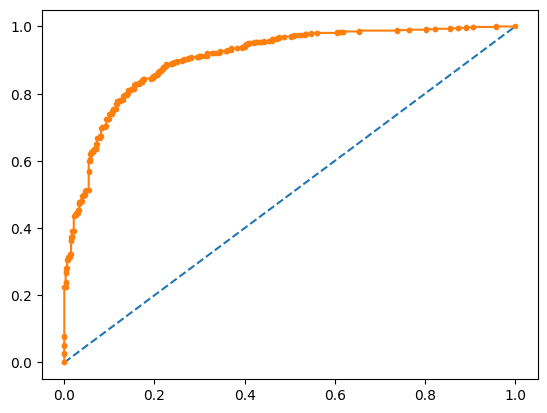

In [ ]:
#ROC and AUC for TRAIN DATA
probs=rf.predict_proba(x_train)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show() 

AUC :0.8948


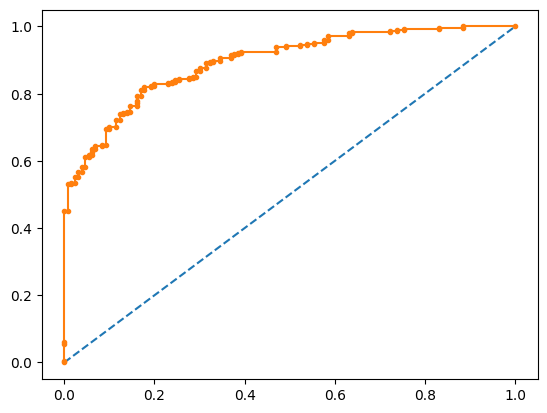

In [ ]:
#ROC and AUC for TEST DATA
probs=rf.predict_proba(x_test)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**BOOSTING :**

ADABOOSTER :

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [ ]:
adb=AdaBoostClassifier()
grid_search=GridSearchCV(estimator=adb,param_grid=param_grid)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [ ]:
adb=grid_search.best_estimator_
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000)

In [ ]:
## Performance Matrix on train data set
y_train_predict = adb.predict(x_train)
adb_model_score = adb.score(x_train, y_train)
print(adb_model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8350515463917526
[[217 115]
 [ 61 674]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       332
           1       0.85      0.92      0.88       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



In [ ]:
## Performance Matrix on test data set
y_test_predict = adb.predict(x_test)
adb_test_model_score = adb.score(x_test, y_test)
print(adb_test_model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 85  45]
 [ 32 296]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       130
           1       0.87      0.90      0.88       328

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC :0.9018


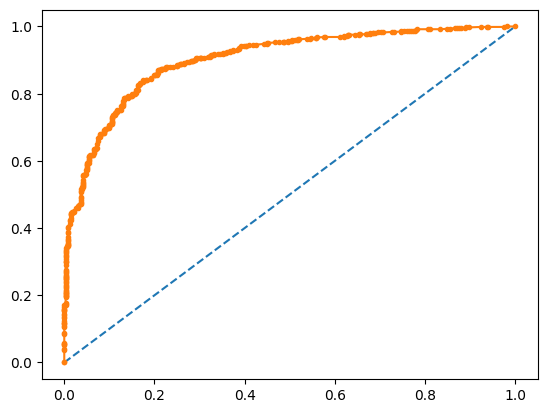

In [ ]:
#ROC and AUC for TRAIN DATA
probs=adb.predict_proba(x_train)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC :0.8928


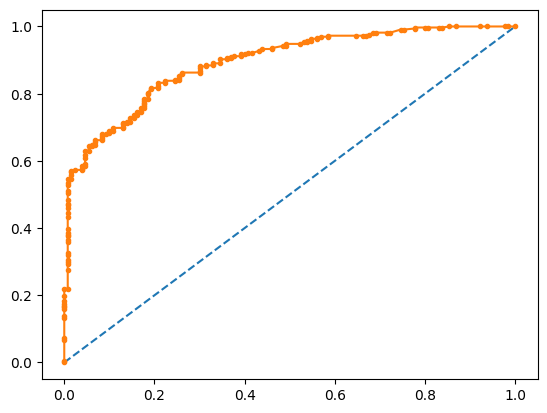

In [ ]:
#ROC and AUC for TEST DATA
probs=adb.predict_proba(x_test)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**DECISION TREE :**

In [ ]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [ ]:
dt= DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=10)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [ ]:
dt=grid_search.best_estimator_
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=70,
                       random_state=0)

In [ ]:
## Performance Matrix on train data set
y_train_predict = dt.predict(x_train)
dt_score = dt.score(x_train, y_train)
print(dt_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.837863167760075
[[231 101]
 [ 72 663]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [ ]:
## Performance Matrix on test data set
y_test_predict = dt.predict(x_test)
dt_score = dt.score(x_test, y_test)
print(dt_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8144104803493449
[[ 88  42]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       130
           1       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC :0.8964


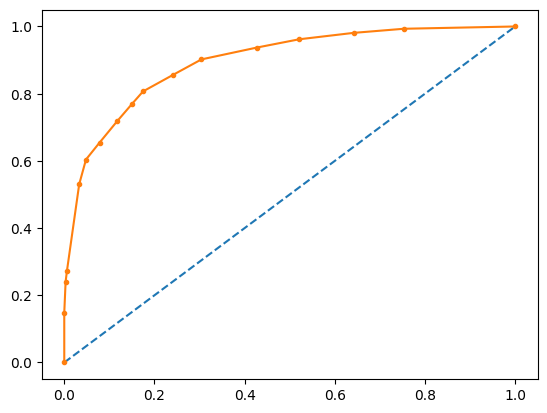

In [ ]:
#ROC and AUC for TRAIN DATA
probs=dt.predict_proba(x_train)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC :0.8697


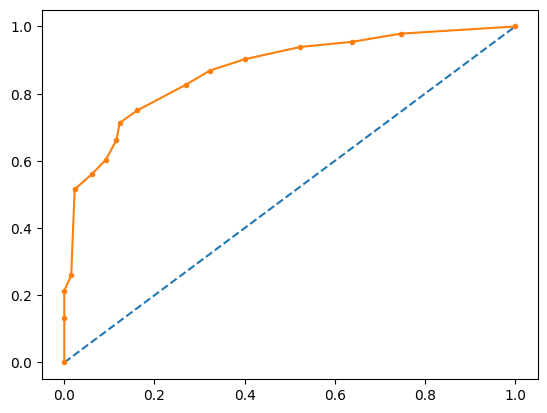

In [ ]:
#ROC and AUC for TEST DATA
probs=dt.predict_proba(x_test)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**GRADIENT BOOSTING :**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=1)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
y_train_predict = gbc.predict(x_train)
gbc_score = gbc.score(x_train, y_train)
print(gbc_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [ ]:
y_train_predict = gbc.predict(x_test)
gbc_score = gbc.score(x_test, y_test)
print(gbc_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 88  42]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       130
           1       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC :0.9501


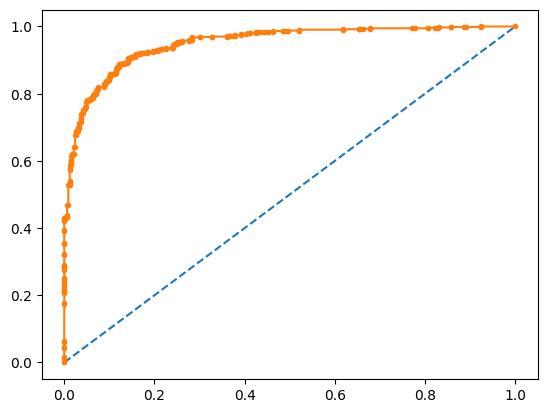

In [ ]:
#ROC and AUC for TRAIN DATA
probs=gbc.predict_proba(x_train)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC :0.9043


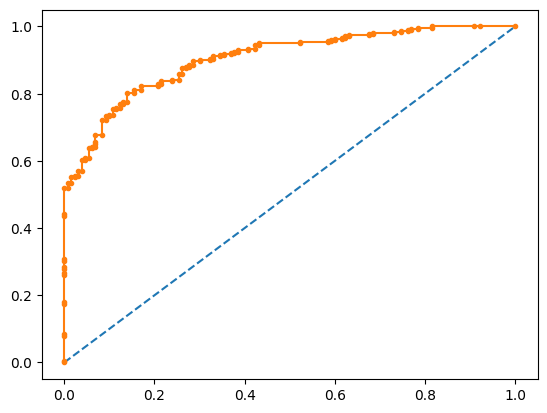

In [ ]:
#ROC and AUC for TEST DATA
probs=gbc.predict_proba(x_test)
probs=probs[:,1]
#calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC :%.4f'%auc)
#calculate ROC
fpr,tpr,theshold=roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()